In [1]:
from pathlib import Path
import torch
import yaml
import torch
from inference import Inference
import matplotlib.pyplot as plt
import torchvision

### TEST GENERATION

In [2]:
def show_image_grid(xt, nrow=5, save_path="generation_samples/grid.png"):
    """
    xt: Tensor of shape (B, 3, H, W)
    nrow: Number of images per row
    """
    grid = torchvision.utils.make_grid(xt.cpu().detach(), nrow=nrow, padding=2, normalize=True)
    plt.figure(figsize=(12, 6))
    plt.imshow(grid.permute(1, 2, 0))  # Convert from CxHxW to HxWxC
    plt.axis('off')
    plt.savefig(save_path)
    plt.show()

In [3]:
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
    f.close()
inf = Inference(config)

Model loaded successfully ..


In [7]:
xt = inf.generate()

100 timestep complete
200 timestep complete
300 timestep complete
400 timestep complete
500 timestep complete
600 timestep complete
700 timestep complete


In [8]:
x = torch.clamp(xt, -1.0, 1.0)
x = (x+1)/2

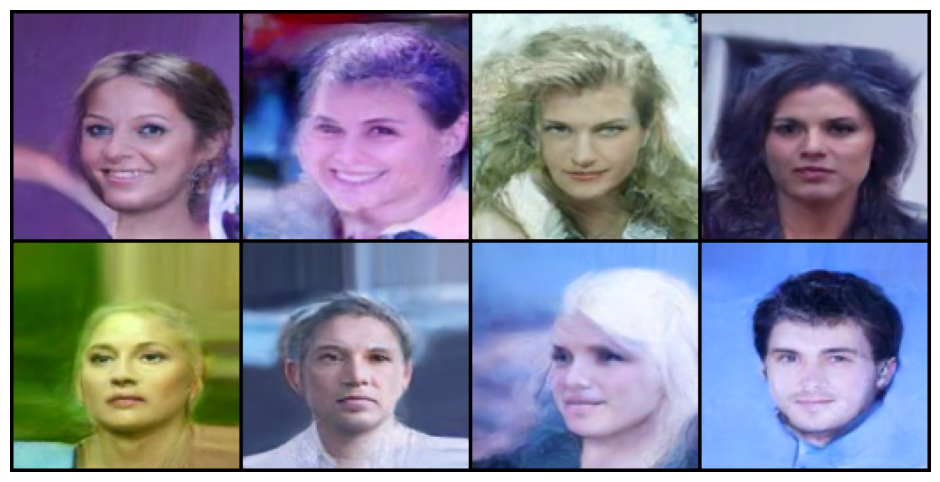

In [9]:
path = Path.cwd()/"generation_samples"
Path.mkdir(path, exist_ok=True)
show_image_grid(x, nrow=4, save_path=path / "grid_3.png")
